# Lab4 - Training Deep Neural Network
- นาย นันท์มนัส ตั้งประเสริฐ, 63070501040
- นาย สัณหณัฐ พรมจรรย์, 63070501069

Name your file to 1040_1069.ipynb

## Lab Instruction

In this lab, you will learn how to train a deep fully-connected neural network with Keras and Tensorflow. MNIST data, a Keras built-in dataset, will be used.

See http://yann.lecun.com/exdb/mnist

**Note:**
Before initiating on any machine learning/deep learning project, consider the following:
1. What is your problem and what data do you have?
- What kind of issue do you want to solve?
- What data do you have?
- What are you trying to predict?
- Is there enough information in your data for your model to predict the expected output?

2. How do you measure success?
- What do you mean by "good model performance"? How do you know if your model is ready for deployment?
- Accuracy? What about precision and recall? AUC? ROC?

3. What is your method of evaluation?
- Holding method? CV? Iterate CV?

4. How should your data be preprocessed before being fed into a model?

5. What is your baseline? What is a model structure? How does your last layer look? What is the loss function? What is the optimization function?

6. Develop an overfit model to determine the size of the model required by
<br> 6.1 Add more layers
<br> 6.2 Increase the number of neurons
<br> 6.3 Train more epochs

7. Fine-tune your model to achieve a balance of underfit and overfit performance (optimization vs generalization)


**Exploding Gradients :**

Exploding gradients can produce an unstable network that, at best, cannot learn from the training data and, at worst, produces NaN weight values that cannot be updated.

Ref : : https://machinelearningmastery.com/exploding-gradients-in-neural-networks/?fbclid=IwAR1DOg3pD0RSaxpHMZEEtIqxeCDMsvwkf-OxMb7HL5eK7_qLc4uLNEYcJus



First, import all necessary libraries to this project.

In [ ]:
import keras
import numpy as np

### 1. Load MNIST data

In [ ]:
from keras.datasets import mnist

### Load data ###
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#################

11490434/11490434 [==============================] - 0s 0us/step


Learn more about the data. For example:
- The distribution of target classes.
- The characteristic of the input data. How does it look like?
- etc.

### Type of dataset

In [ ]:
print('Feature type: %s'%type(train_images))
print('Label type: %s'%type(train_labels))

Feature type: <class 'numpy.ndarray'>
Label type: <class 'numpy.ndarray'>


### Type of value in the dataset

In [ ]:
print('Feature data type: %s'%train_images.dtype)
print('Label data type: %s'%train_labels.dtype)

Feature data type: uint8
Label data type: uint8


### Shape

In [ ]:
print('Train_set Feature shape: %s'%str(train_images.shape))
print('Train_set Label type: %s'%str(train_labels.shape))
print('Test_set Feature shape: %s'%str(test_images.shape))
print('Test_set Label type: %s'%str(test_labels.shape))

Train_set Feature shape: (60000, 28, 28)
Train_set Label type: (60000,)
Test_set Feature shape: (10000, 28, 28)
Test_set Label type: (10000,)


### Dimension

In [ ]:
print('Train_set Feature dimension: %s'%str(train_images.ndim))
print('Train_set Label dimension: %s'%str(train_labels.ndim))
print('Test_set Feature dimension: %s'%str(test_images.ndim))
print('Test_set Label dimension: %s'%str(test_labels.ndim))

Train_set Feature dimension: 3
Train_set Label dimension: 1
Test_set Feature dimension: 3
Test_set Label dimension: 1


### Characteristic of data

In [ ]:
train_images[0]

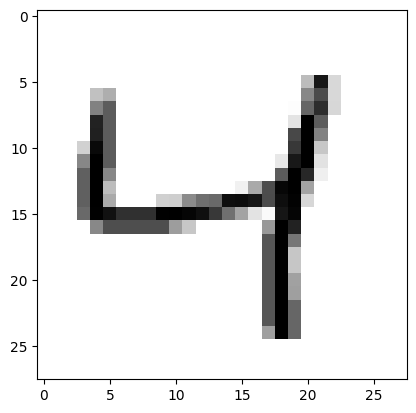

In [ ]:
digit = train_images[2]

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digit, cmap=plt.cm.binary)

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 2. Preprocess a data

In [ ]:
from keras.utils import to_categorical

In [ ]:
train_images = train_images.reshape(60000,28*28) # Reshape
train_images = train_images.astype('float32')/255 # Normalize

test_images = test_images.reshape(10000,28*28) # Reshape
test_images = test_images.astype('float32')/255 # Normalize

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test_labels.shape

(10000, 10)

### 3. Build a model

Build a five-fully connected layer with 128 neurons each, *elu* as an activation function, and *he initialier* as a weight initialier function using `Sequential()`.

The output is a probability for each target class using *softmax* as an activation function. We will use the *Adam optimizer* with the *cross-entropy loss function*.

In [ ]:
from keras import models
from keras import layers

In [ ]:
network = models.Sequential()
network.add(layers.Dense(128, activation='elu',input_shape=(28*28,)))
network.add(layers.Dense(128,  activation='elu'))
network.add(layers.Dense(128,  activation='elu'))
network.add(layers.Dense(128,  activation='elu'))
network.add(layers.Dense(128,  activation='elu'))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 167818 (655.54 KB)
Trainable params: 16781

### 4. Train the model

We will train the model with 10 epochs and a batch size of 128.

To avoid information leakage to the test set, which would lead to overfitting, we will divide the data into three sets: train, test, and validation. Hence, we will divide the training data into 90% train set and 10% validation set.

Because the keras `validation_split` argument split the last 10% of data to be validation set, the target class may not be evenly distributed in validation set. As a result, we must use sklearn's `train_test_split` function to divide the data into train and validation sets.

Hint: Use the parameter `stratify = y` in `train_test_split()`
See http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

### Split data ###
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.1, random_state=42, stratify=train_labels)
##################

In [ ]:
### Fit the model ###
history = network.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))
#####################

Epoch 1/10
422/422 [==============================] - 6s 11ms/step - loss: 0.2891 - accuracy: 0.9122 - val_loss: 0.1803 - val_accuracy: 0.9440
Epoch 2/10
422/422 [==============================] - 4s 9ms/step - loss: 0.1387 - accuracy: 0.9577 - val_loss: 0.1504 - val_accuracy: 0.9523
Epoch 3/10
422/422 [==============================] - 8s 18ms/step - loss: 0.1035 - accuracy: 0.9676 - val_loss: 0.1189 - val_accuracy: 0.9642
Epoch 4/10
422/422 [==============================] - 6s 15ms/step - loss: 0.0775 - accuracy: 0.9754 - val_loss: 0.1068 - val_accuracy: 0.9688
Epoch 5/10
422/422 [==============================] - 6s 14ms/step - loss: 0.0642 - accuracy: 0.9790 - val_loss: 0.0987 - val_accuracy: 0.9722
Epoch 6/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0573 - accuracy: 0.9814 - val_loss: 0.0947 - val_accuracy: 0.9722
Epoch 7/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0463 - accuracy: 0.9846 - val_loss: 0.0936 - val_accuracy: 0.9753
Ep

### 5. Evalute the model

Consider the metric you want to use to evaluate/measure the performance of your model in order to answer the following questions:
- Is the model overfit or underfit?
- At what epoch/iteration does it converge or does the model overfit?
- How does the model perform across all data classes? What is your model's overall performance?

In [ ]:
import  matplotlib.pyplot  as plt
%matplotlib inline
# The function argument is the model's history during the training process.
def plot_loss_fn(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

def plot_acc_fn(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

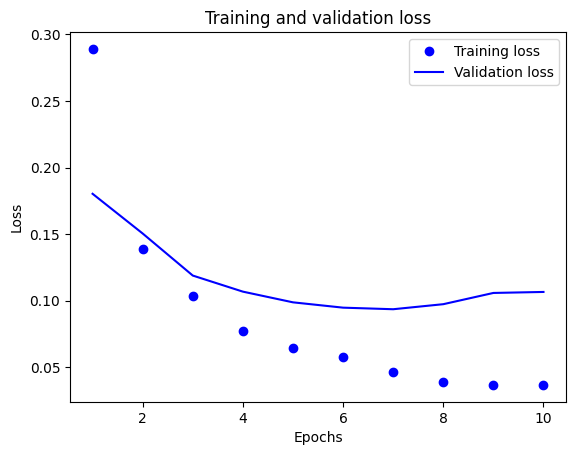

In [ ]:
plot_loss_fn(history)

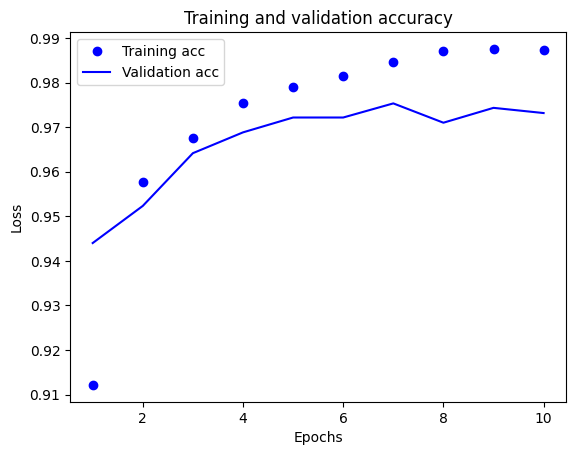

In [ ]:
plot_acc_fn(history)

In [ ]:
### Evaluate the model ###
test_loss, test_acc = network.evaluate(X_val, y_val)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))
##########################

188/188 [==============================] - 1s 3ms/step - loss: 0.1065 - accuracy: 0.9732
Test Loss: 0.10654445737600327
Test Accuracy: 0.9731666445732117


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

res = network.predict(X_val)
res = np.argmax(res, axis=1)
true_y_val = np.argmax(y_val, axis=1)

### evaluate your model ###
# Confusion matrix
cm = confusion_matrix(true_y_val , res)
print("Confusion Matrix:")
print(cm)

# Classification report
print(classification_report(true_y_val, res))

188/188 [==============================] - 1s 2ms/step
Confusion Matrix:
[[586   0   0   0   1   2   1   0   2   0]
 [  0 665   2   3   0   0   0   0   4   0]
 [  2   4 575   7   1   1   1   2   1   2]
 [  0   1   3 595   0   4   0   0   7   3]
 [  1   3   3   0 562   1   2   3   1   8]
 [  1   0   1   8   1 521   4   1   3   2]
 [  4   1   3   0   0   2 580   0   2   0]
 [  0   2   4   2   2   0   0 616   1   0]
 [  2   3   3   1   1   4   1   1 567   2]
 [  2   3   0   1   4   1   0  10   2 572]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       592
           1       0.98      0.99      0.98       674
           2       0.97      0.96      0.97       596
           3       0.96      0.97      0.97       613
           4       0.98      0.96      0.97       584
           5       0.97      0.96      0.97       542
           6       0.98      0.98      0.98       592
           7       0.97      0.98      0.98       627
         

**✨Answer**

1. **โดยรวมโมเดล fit ได้อย่างดี ไม่ under หรือ over เนื่องจาก train มีแนวโน้มที่ดีขึ้น ขณะที่ test หรือ validation เองก็มีแนวโน้มที่ดีข้นเช่นกัน  และในขณะที่ accuracy เยอะ ก็มี loss น้อยลงในเวลาเดียวกัน ซึ่งชี้ว่าโมเดลมีประสิทธิภาพที่ดี**
2. **จากกราฟ ใน epoch ที่ 7 จะเริ่มมีโอกาสเกิด overfit ได้เพราะว่ามีการสวนทางกันของผลลัพ train test**
3. **model perform ดีมากๆ ในแต่ละ class precision เฉลี่ยที่ 0.97 แต่มี class ที่แย่สุดคือ class9**

### 6. Tune the model

Try to tune your model by:
1. Try increasing the number of epochs to see how it affects your model? Does the results improve or become overfit?
2. Apply an early stop. What do you get as a result? (See also https://chrisalbon.com/deep_learning/keras/neural_network_early_stopping/)
4. Try adding regularizers l1 or l2 (or simutaneus l1, l2) to your model. How does it affect your model?
5. Try adding dropout (any dropout rate) with every layer. What effect does it have on your model? Does it help in the reduction of overfit?

*In the discussion section, discuss the result of these steps*

After completing the preceding steps, **try to achieve the highest precision** by tuning the model using what you have already learned in class. You can experiment with changing the model's structure by increasing or decreasing the number of layers and neuron nodes in each layer. (Use only fully-connected layers for now; no other types of layers!)

**The MNIST model's current highest precision is around 99.8%** (Just try as hard as you can; don't be concerned if you don't achieve this level of precision.)

**In each tuning step, write down what you're doing and why**

**✨Answer 1: การเพิ่มจำนวน epochs ทำ model มีโอกาสเรียนรู้จาก train data มากขึ้น เห็นได้ชัดว่า training loss ลดลง และ training accuracy เพิ่มชึ้น ในขณะที่ validation loss เริ่มเพิ่มขึ้นหรือลดลง แต่ training loss ยังคงลดลง ซึ่งทำให้เกิด overfit ได้**

In [ ]:
history = network.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))

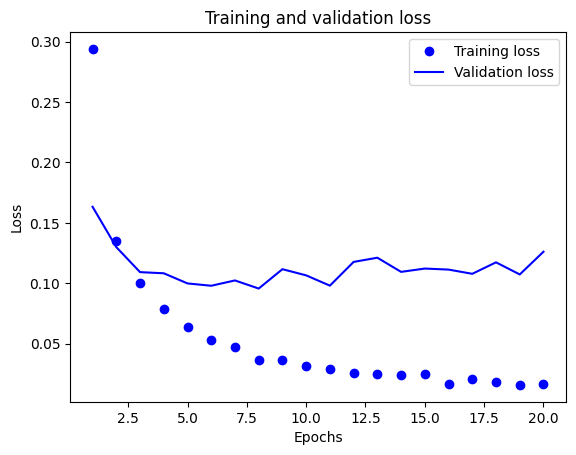

In [ ]:
plot_loss_fn(history)

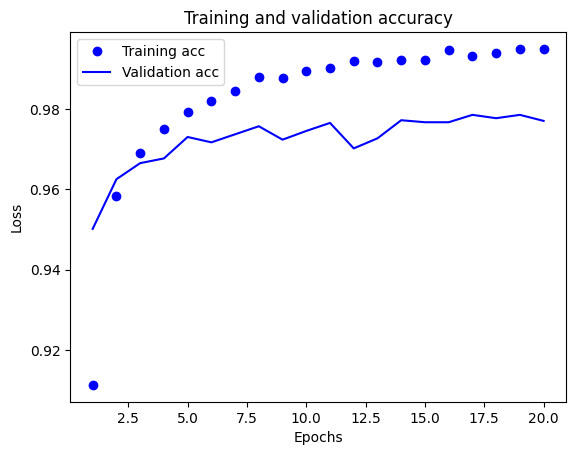

In [ ]:
plot_acc_fn(history)

**✨Answer 2: EarlyStopping เพื่อกำหนดจำนวน training epochs ที่เหมาะสมที่สุดโดยอัตโนมัติ โดยจะตรวจ validation loss ระหว่างการ train และหยุดการ train เมื่อเริ่มเกิด validation loss เพิ่มขึ้นหรือคงที่ ซึ่งบ่งชี้ว่า model ไม่มีการปรับปรุงกับ unseen data ดังนั้นจึงหยุดที่ epoch ที่ 4 ซึ่งมีแนวโน้มที่จะเกิด overfit ได้ด้วย**

In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', verbose=1)

history = network.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/20
422/422 [==============================] - 12s 16ms/step - loss: 0.2948 - accuracy: 0.9103 - val_loss: 0.1873 - val_accuracy: 0.9408
Epoch 2/20
422/422 [==============================] - 5s 12ms/step - loss: 0.1370 - accuracy: 0.9572 - val_loss: 0.1245 - val_accuracy: 0.9608
Epoch 3/20
422/422 [==============================] - 4s 8ms/step - loss: 0.0999 - accuracy: 0.9685 - val_loss: 0.1092 - val_accuracy: 0.9642
Epoch 4/20
422/422 [==============================] - 4s 8ms/step - loss: 0.0773 - accuracy: 0.9753 - val_loss: 0.1139 - val_accuracy: 0.9683
Epoch 4: early stopping


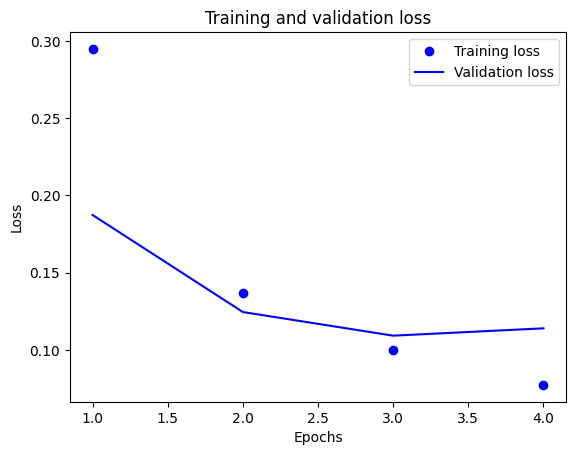

In [ ]:
plot_loss_fn(history)

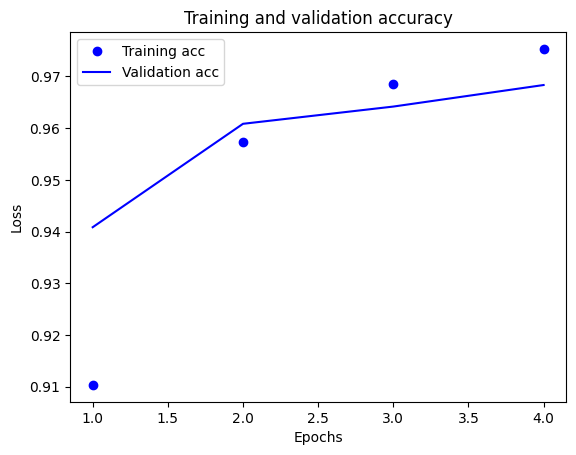

In [ ]:
plot_acc_fn(history)

**✨Answer 3: L2 regularization ช่วยให้ป้องกันการ overfit และปรับปรุง generalization เป็นหลัก โดยเฉพาะช่วยจัดการกับการ overfit, noisy data ซึ่งหาก training loss ของ model เพิ่มขึ้นเมื่อใช้ L2 regularization แสดงว่าเงื่อนไขการทำให้ regularization นั้นกีดกัน model ที่ได้จากการปรับข้อมูลการ train ให้ closely ข้อเสียคือความแม่นยำในการ train model ต่ำกว่าเดิม ค่า loss สูง แต่ประสิทธิภาพของ model กับ unseen data มีแนวโน้มที่จะได้รับการ improved**

In [ ]:
from keras.regularizers import l1, l2

network2 = models.Sequential()
network2.add(layers.Dense(128,  activation='elu', input_shape=(28*28,), kernel_regularizer=l2(0.01)))
network2.add(layers.Dense(128,  activation='elu', kernel_regularizer=l2(0.01)))
network2.add(layers.Dense(128,  activation='elu', kernel_regularizer=l2(0.01)))
network2.add(layers.Dense(128,  activation='elu', kernel_regularizer=l2(0.01)))
network2.add(layers.Dense(128,  activation='elu', kernel_regularizer=l2(0.01)))
network2.add(layers.Dense(10, activation='softmax'))

network2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history2 = network2.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/10
422/422 [==============================] - 5s 9ms/step - loss: 2.0955 - accuracy: 0.8767 - val_loss: 0.8468 - val_accuracy: 0.8947
Epoch 2/10
422/422 [==============================] - 3s 8ms/step - loss: 0.7882 - accuracy: 0.8940 - val_loss: 0.7692 - val_accuracy: 0.8837
Epoch 3/10
422/422 [==============================] - 5s 11ms/step - loss: 0.7237 - accuracy: 0.9015 - val_loss: 0.7344 - val_accuracy: 0.8895
Epoch 4/10
422/422 [==============================] - 3s 8ms/step - loss: 0.6796 - accuracy: 0.9102 - val_loss: 0.6931 - val_accuracy: 0.9017
Epoch 5/10
422/422 [==============================] - 4s 8ms/step - loss: 0.6376 - accuracy: 0.9172 - val_loss: 0.6397 - val_accuracy: 0.9167
Epoch 6/10
422/422 [==============================] - 5s 12ms/step - loss: 0.6058 - accuracy: 0.9243 - val_loss: 0.6185 - val_accuracy: 0.9193
Epoch 7/10
422/422 [==============================] - 4s 8ms/step - loss: 0.5869 - accuracy: 0.9270 - val_loss: 0.5759 - val_accuracy: 0.9340
Epoc

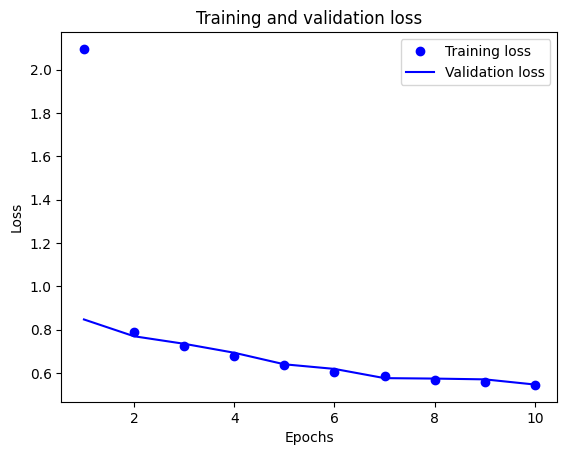

In [ ]:
plot_loss_fn(history2)

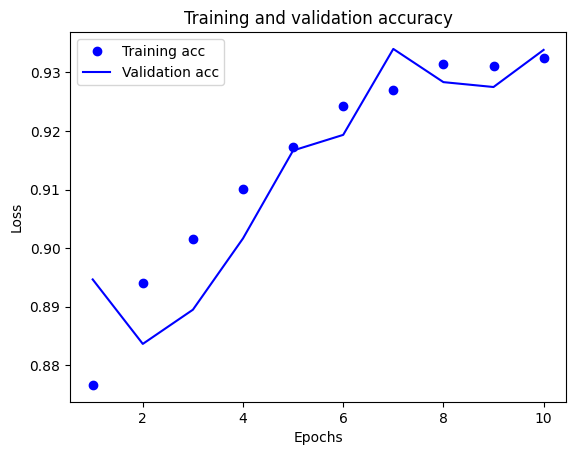

In [ ]:
plot_acc_fn(history2)

**✨Answer 4: การเพิ่ม dropout layers ด้วย dropout rate ให้กับแต่ละเลเยอร์ของ model เป็นเทคนิคทั่วไปและมีประสิทธิภาพในการ reducing overfitting และ improving generalization ด้วยการแนะนำ noise during training โดย dropout จะช่วยให้โมเดลไม่เกิดการ overfit แต่จะทำให้มีความแม่นยำในการ train model ต่ำกว่าเดิม และประสิทธิภาพของ model กับ unseen data มีแนวโน้มที่จะได้รับการ improved**

In [ ]:
from keras.layers import Dropout

network3 = models.Sequential()
network3.add(layers.Dense(128, activation='elu', input_shape=(28*28,)))
network3.add(Dropout(0.5))
network3.add(layers.Dense(128, activation='elu'))
network3.add(Dropout(0.5))
network3.add(layers.Dense(128, activation='elu'))
network3.add(Dropout(0.5))
network3.add(layers.Dense(128, activation='elu'))
network3.add(Dropout(0.5))
network3.add(layers.Dense(128, activation='elu'))
network3.add(Dropout(0.5))
network3.add(layers.Dense(10, activation='softmax'))

network3.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history3 = network3.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/10
422/422 [==============================] - 6s 11ms/step - loss: 1.0606 - accuracy: 0.6506 - val_loss: 0.3617 - val_accuracy: 0.8997
Epoch 2/10
422/422 [==============================] - 5s 12ms/step - loss: 0.5963 - accuracy: 0.8158 - val_loss: 0.3311 - val_accuracy: 0.9068
Epoch 3/10
422/422 [==============================] - 4s 10ms/step - loss: 0.4902 - accuracy: 0.8538 - val_loss: 0.3053 - val_accuracy: 0.9155
Epoch 4/10
422/422 [==============================] - 4s 10ms/step - loss: 0.4254 - accuracy: 0.8771 - val_loss: 0.2809 - val_accuracy: 0.9198
Epoch 5/10
422/422 [==============================] - 5s 13ms/step - loss: 0.3871 - accuracy: 0.8886 - val_loss: 0.2533 - val_accuracy: 0.9307
Epoch 6/10
422/422 [==============================] - 4s 10ms/step - loss: 0.3536 - accuracy: 0.8990 - val_loss: 0.2373 - val_accuracy: 0.9327
Epoch 7/10
422/422 [==============================] - 4s 10ms/step - loss: 0.3319 - accuracy: 0.9064 - val_loss: 0.2335 - val_accuracy: 0.9348

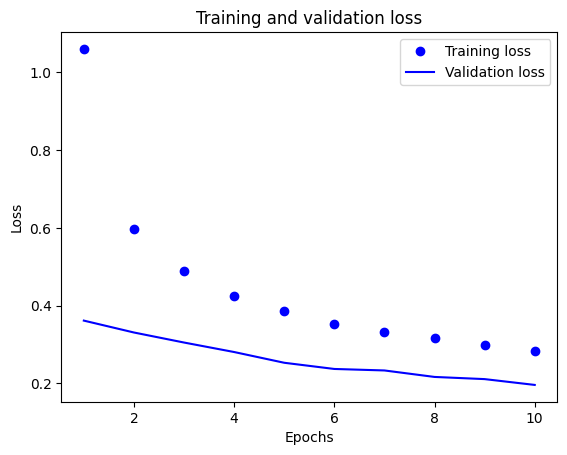

In [ ]:
plot_loss_fn(history3)

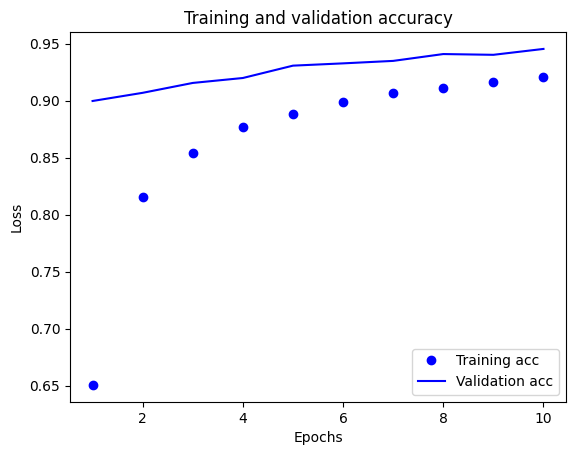

In [ ]:
plot_acc_fn(history3)

### 7. Final Evaluation

After you've determined that your model is good enough to be deployed in an application, it's time to evaluate it with a test set to ensure that it generalizes well and does not overfit to the validation set.

In [ ]:
final_nn = models.Sequential()
final_nn.add(layers.Dense(128, activation='relu',input_shape=(28*28,)))
network3.add(Dropout(0.5))
final_nn.add(layers.Dense(10, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)

final_nn.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', verbose=1)
final_history = final_nn.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(train_images,train_labels), callbacks=[early_stop])

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.3618 - accuracy: 0.9007 - val_loss: 0.2073 - val_accuracy: 0.9391
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1682 - accuracy: 0.9524 - val_loss: 0.1302 - val_accuracy: 0.9638
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1198 - accuracy: 0.9655 - val_loss: 0.1023 - val_accuracy: 0.9710
Epoch 4/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0932 - accuracy: 0.9736 - val_loss: 0.0717 - val_accuracy: 0.9810
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0748 - accuracy: 0.9787 - val_loss: 0.0627 - val_accuracy: 0.9827
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0621 - accuracy: 0.9822 - val_loss: 0.0540 - val_accuracy: 0.9846
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0514 - accuracy: 0.9849 - val_loss: 0.0455 - val_accuracy: 0.9869
Ep

### Result & Discussion

- Summarize the main findings from this lab. Discuss what you did, what you got as a result, and why (support your reason)

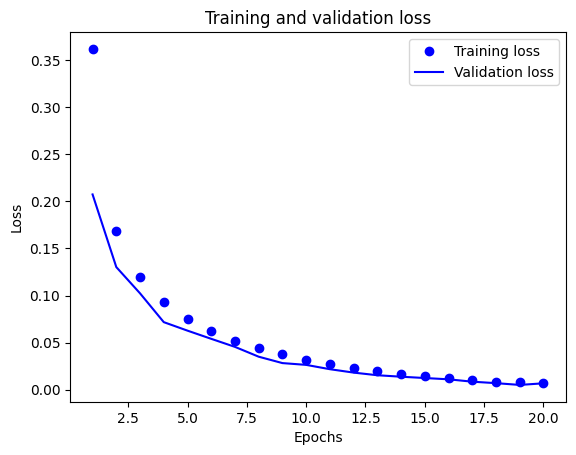

In [ ]:
plot_loss_fn(final_history)

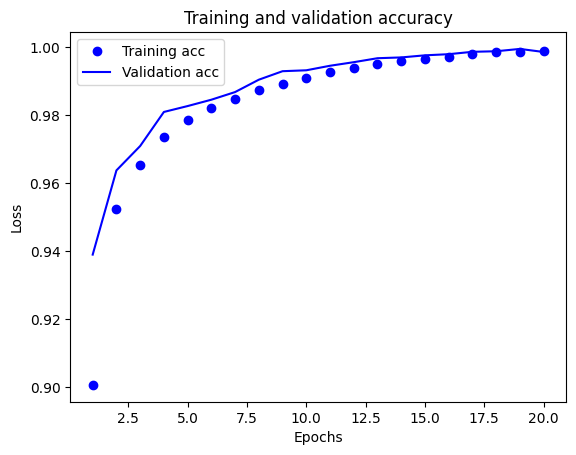

In [ ]:
plot_acc_fn(final_history)

In [ ]:
### Evaluate the model ###
test_loss, test_acc = final_nn.evaluate(test_images,test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))
##########################

313/313 [==============================] - 1s 2ms/step - loss: 0.0855 - accuracy: 0.9783
Test Loss: 0.08549020439386368
Test Accuracy: 0.9782999753952026


In [ ]:
res = final_nn.predict(test_images)
res = np.argmax(res, axis=1)
true_test_labels = np.argmax(test_labels, axis=1)

### evaluate your model ###
# Confusion matrix
cm = confusion_matrix(true_test_labels , res)
print("Confusion Matrix:")
print(cm)

# Classification report
print(classification_report(true_test_labels, res))

313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[ 971    0    0    0    0    2    2    2    3    0]
 [   0 1124    5    0    0    2    1    1    2    0]
 [   5    2 1010    1    3    0    2    6    3    0]
 [   0    0    4  989    1    6    0    1    0    9]
 [   2    0    1    0  963    0    5    2    1    8]
 [   2    0    0    2    0  880    4    0    2    2]
 [   7    3    1    1    5    5  934    1    1    0]
 [   1    4   10    3    1    0    0 1005    2    2]
 [   5    1    4    8    7    5    3    3  933    5]
 [   3    3    0    5    9    7    0    4    4  974]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.99      0.98       892
           6     

**✨Answer**

**เห็นได้ว่าเมื่อนำโมเดลที่ปรับแล้วมาใช้กับ test set ของจริงที่ไม่เคยเห็น มีผลลัพธ์ที่ค่อนข้างดีโดยมี acc เฉลี่ยสูงถึง 0.978 ซึ่งการที่ model สามารถ perform ได้ดีทั้งตอน train validate และ test แสดงให้เห็นว่าสามารถ avoid overfit ได้**

**โดยเราจะทำการจูน hyperparameter ใน keras เพื่อดูว่าแต่ละ parameter ของโมเดลนั้นส่งผลอะไรบ้าง เริ่มตั้งแต่การสร้าง Neuron architecture การเลือก optimizer, activation function ที่เข้ากันกับ dataset โดยเลือก ReLU เป็น activation แค่ 1 hidden layer และ optimizer เป็น adam ซึ่งในขั้นตอนการจูน parameter เราก็ได้ลองจูนตามขึ้นตอนที่เขียนใน lab พอได้ลองทั้งหมดแล้วก็ลองนำ parameter ที่ใช้ได้มาใช้ด้วยกันใน lab นี้พวกเราจะสร้างโมเดลซึ่งเราไม่ได้ใช้ L1 L2 regularization เนื่องจากความแม่นยำน้อยลงทำให้ต้องเพิ่ม epoch และ loss มีค่าสูง แต่เราใช้ Dropout ในการ tuning พบว่าได้ค่า accuracy และ validate ที่สูงมากที่ 0.5 พอลองลดค่าน้อยกว่า rate 0.5 ก็จะเกิด Overfit พอมากกว่า 0.5 กราฟข้อมูลก็จะไม่บรรจบกัน และได้ใช้ EarlyStopping เพื่อกำหนดจำนวน training epochs ที่เหมาะสมที่สุดโดยอัตโนมัติ โดยจะตรวจ validation loss ระหว่างการ train และหยุดการ train เมื่อเริ่มเกิด validation loss เพิ่มขึ้นหรือคงที่**

In [ ]:
final_nn.save('lab5_DNN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 8. Play with your model

1. Create a 28x28 pixel (any resolution) drawing in any drawing application (for example, Paint or Adobe Photoshop) with a black (#000000) background and white (#FFFFFF) paint.

2. Draw three distinct single digit numbers from 0 to 9. The images should then be saved in PNG format.

3. Install open-cv by
    <br/>for local pc :
 (See https://pypi.org/project/opencv-python)  
> `pip install opencv-python` <br/> or conda (See https://anaconda.org/conda-forge/opencv)

    for colab use:
```import cv2 as cv```

4. Load your images to this IPython using the ```imread()``` function
5. Preprocess the images in the same way you did during the development process.
6. Feed your images to your best model.

What class does your model predict? Is it correct? If not, why does it still get a wrong result when your model is more than 90% accurate?

In [ ]:
import cv2
import os
from keras.models import load_model

model = load_model('lab5_DNN.h5')

In [ ]:
directory = "/content/"

image_paths = sorted([os.path.join(directory, filename) for filename in os.listdir(directory) if filename.endswith(".jpg")])

images = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in image_paths]
preprocessed_images = []
for image in images:
    image = cv2.resize(image, (28, 28))
    image = image.astype('float32') / 255.0
    # Flatten the image to (784,) shape
    flattened_image = image.flatten()
    preprocessed_images.append(flattened_image)

preprocessed_images = np.array(preprocessed_images)

In [ ]:
image_paths

['/content/0p1.jpg',
 '/content/0p2.jpg',
 '/content/0p3.jpg',
 '/content/1p1.jpg',
 '/content/1p2.jpg',
 '/content/1p3.jpg',
 '/content/2p1.jpg',
 '/content/2p2.jpg',
 '/content/2p3.jpg',
 '/content/3p1.jpg',
 '/content/3p2.jpg',
 '/content/3p3.jpg',
 '/content/4p1.jpg',
 '/content/4p2.jpg',
 '/content/4p3.jpg',
 '/content/5p1.jpg',
 '/content/5p2.jpg',
 '/content/5p3.jpg',
 '/content/6p1.jpg',
 '/content/6p2.jpg',
 '/content/6p3.jpg',
 '/content/7p1.jpg',
 '/content/7p2.jpg',
 '/content/7p3.jpg',
 '/content/8p1.jpg',
 '/content/8p2.jpg',
 '/content/8p3.jpg',
 '/content/9p1.jpg',
 '/content/9p2.jpg',
 '/content/9p3.jpg']

In [ ]:
from google.colab.patches import cv2_imshow

for image in preprocessed_images:
    cv2_imshow(image.reshape(28, 28) * 255.0)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
predictions = model.predict(preprocessed_images)

1/1 [==============================] - 0s 23ms/step


In [ ]:
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

recognized_digits = []

In [ ]:
for prediction in predictions:
    # Get the predicted class label (digit) with the highest probability
    predicted_label = class_labels[np.argmax(prediction)]

    recognized_digits.append(predicted_label)

print(f"Recognized digits: {recognized_digits}")

Recognized digits: ['0', '0', '0', '8', '3', '3', '2', '2', '2', '3', '3', '3', '5', '6', '4', '5', '5', '5', '6', '8', '6', '7', '7', '7', '8', '8', '8', '9', '9', '8']


**✨Answer**

 **ตัวเลขที่ผิดมี 1, 4, 6, 9
โดยเลข 1, 4 มีลักษณะของรูปภาพไม่เหมือนตอน train data เลย detect พลาด เนื่องจากเลข 1 จะไม่มีหัวและ เลข 4 ข้างบนจะไม่ชิดกัน ส่วนเลข 6, 9 อาจเกิดจากความผิดพลาดของรูปภาพที่ไม่ชัดเจน เลขที่มีพิเซลไม่ชัดเจนพอที่เป็นตัวเลขนั้น ต้องเพิ่มข้อมูลที่มีหลายลักษณะมากขึ้นเพื่อมาใช้ในการ train data และเตรียมข้อมูลเพิ่มสำหรับการ test data**

### Challenges: Play with initializer

- Build a two-layer neural network with any hyperparameter
- Use or create a weight initializer function that sets all the weights to one. See: https://keras.io/initializers/
- Discuss the results. What happened? and why?